<a href="https://colab.research.google.com/github/mpantonucci/Bootcamp-DataScience/blob/main/notebook_live_monitoria_1_bootcamp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas que vou utilizar hoje 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leitura do arquivo quase igual a do curso, com a diferença que já estou removendo a coluna de Total e que estou colocar a coluna de UF como index

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

dados = pd.read_csv(url, encoding="ISO-8859-1", engine='python',
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", index_col=0).drop('Total', axis=1)
dados.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-
13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33921112.99,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54


Como identificar os dados faltantes ?

In [ ]:
dados.isnull()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12 Acre,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13 Amazonas,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14 Roraima,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15 Pará,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16 Amapá,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17 Tocantins,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
dados.isnull().sum()

1992/Mar    0
1992/Abr    0
1993/Mai    0
1993/Dez    0
1994/Jan    0
           ..
2020/Abr    0
2020/Mai    0
2020/Jun    0
2020/Jul    0
2020/Ago    0
Length: 278, dtype: int64

In [ ]:
dados.isnull().sum().sum()

0

Dados do tipo Objetct 

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 278 entries, 1992/Mar to 2020/Ago
dtypes: float64(156), object(122)
memory usage: 58.9+ KB


São justamente os hifens 

In [ ]:
dados.loc['35 São Paulo':].select_dtypes('object')

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,2006/Jun,2006/Jul,2006/Ago,2006/Set,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,-,19442.14,-,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,-,167713.68,149751.54,54437.07,54469.76,19904.67,80286.48,20502.61,167831.88,93218.69,26313.79,18668.53,1267.55,19169.46,...,19904.67,54089.02,52643.02,78691.89,57860.43,75911.52,19904.67,59719.85,108286.56,18977.88,295.75,8733.40,11209.33,241658.52,26221.20,12288.96,80635.37,63357.24,6786.52,102887.27,124056.77,122631.65,43950.40,38882.55,22101.44,128217.43,61142.61,-,19904.67,-,-,8695.45,27961.35,62859.39,45586.58,19967.71,15514.23,116836.99,367978.67,140414944.95
41 Paraná,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3093.72,-,...,-,-,-,-,-,-,-,-,478.86,1432.10,-,-,524.26,-,-,-,-,-,-,-,-,-,-,-,-,1197.17,-,-,-,-,299.17,-,840.14,1303.55,74.94,-,5930.30,12273.67,143586.15,41542401.16
42 Santa Catarina,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,955.94,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1117.36,508.49,-,-,-,29123.45,107403.78,16991236.43
43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,873.76,...,-,-,-,-,-,-,-,-,-,-,-,411.36,1048.52,-,-,-,-,-,-,-,-,-,-,-,-,1199.87,-,-,-,347.90,-,-,-,-,-,-,-,11694.41,100916.50,28349257.38
50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,9722.90,4059220.22
51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3034.68,233.57,-,-,-,1891.44,4573.77,6174224.99
52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1122.46,-,-,-,1309.80,1199.87,-,-,-,-,-,-,-,11148.83,-,869.70,-,-,-,-,-,347.90,497.01,1143.13,-,862.14,1299.81,-,-,-,32316.96,7673.55,20242641.73
53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2647.89,5141.11,457.97,-,554.69,554.69,104654.16,12044848.02


Buscar na documentação o significado

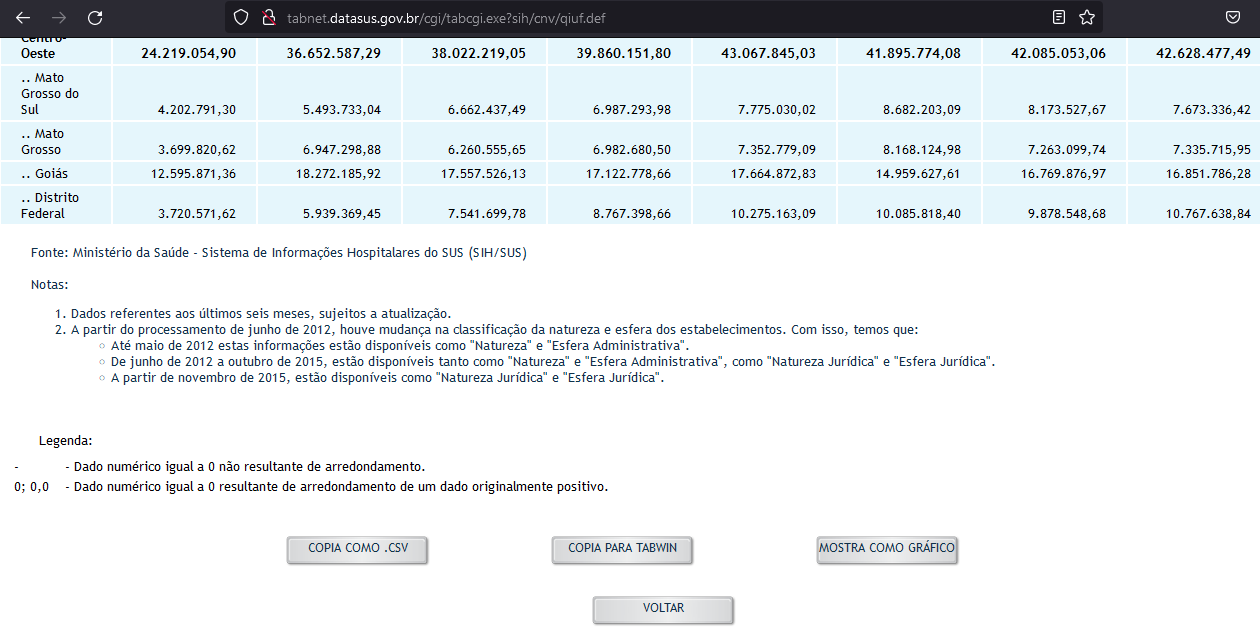

Transformar para NaN porque teremos mais ferramentas para nos ajudar

In [ ]:
dados = dados.replace('-', np.nan)
dados.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,NaN
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33921112.99,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54


Quantos NaN

In [ ]:
dados.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1992/Mar to 2020/Ago
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11 Rondônia             158 non-null    object
 1   12 Acre                 158 non-null    object
 2   13 Amazonas             161 non-null    object
 3   14 Roraima              158 non-null    object
 4   15 Pará                 163 non-null    object
 5   16 Amapá                160 non-null    object
 6   17 Tocantins            162 non-null    object
 7   21 Maranhão             166 non-null    object
 8   22 Piauí                161 non-null    object
 9   23 Ceará                164 non-null    object
 10  24 Rio Grande do Norte  163 non-null    object
 11  25 Paraíba              169 non-null    object
 12  26 Pernambuco           172 non-null    object
 13  27 Alagoas              161 non-null    object
 14  28 Sergipe              165 non-null    object
 15 

In [ ]:
dados.isnull().sum().sum()

2956

Mudar os tipos das colunas

In [ ]:
dados = dados.astype('float64')
dados.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,NaN
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33921112.99,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54


In [ ]:
dados.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1992/Mar to 2020/Ago
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   11 Rondônia             158 non-null    float64
 1   12 Acre                 158 non-null    float64
 2   13 Amazonas             161 non-null    float64
 3   14 Roraima              158 non-null    float64
 4   15 Pará                 163 non-null    float64
 5   16 Amapá                160 non-null    float64
 6   17 Tocantins            162 non-null    float64
 7   21 Maranhão             166 non-null    float64
 8   22 Piauí                161 non-null    float64
 9   23 Ceará                164 non-null    float64
 10  24 Rio Grande do Norte  163 non-null    float64
 11  25 Paraíba              169 non-null    float64
 12  26 Pernambuco           172 non-null    float64
 13  27 Alagoas              161 non-null    float64
 14  28 Sergipe              165 non-nul

Muitos dados nulos

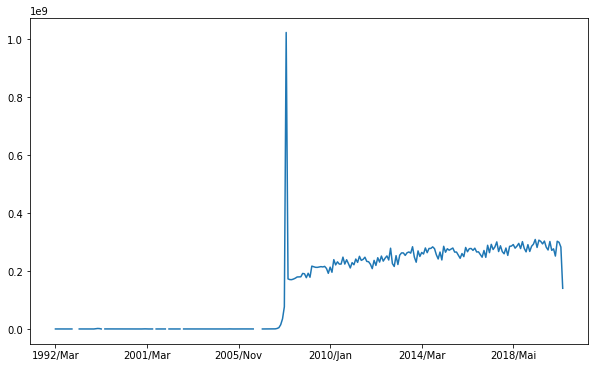

In [ ]:
dados.loc['35 São Paulo'].plot(figsize=(10, 6))

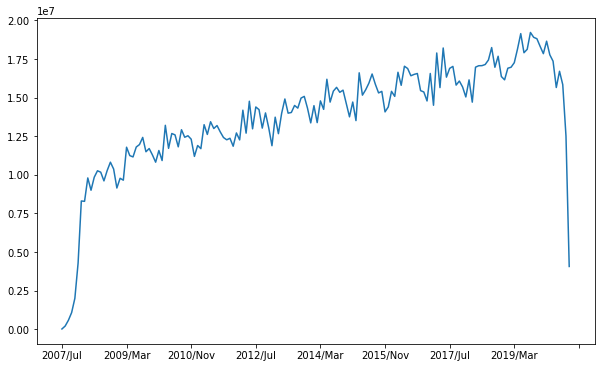

In [ ]:
dados.loc['50 Mato Grosso do Sul'].plot(figsize=(10, 6))

In [ ]:
dados_estado  = dados.loc['35 São Paulo', '2004/Mai':'2007/Jun']
dados_estado

2004/Mai     19904.67
2004/Jun     54089.02
2004/Jul     52643.02
2004/Ago     78691.89
2004/Set     57860.43
2004/Out     75911.52
2004/Nov     19904.67
2004/Dez     59719.85
2005/Jan    108286.56
2005/Fev     18977.88
2005/Mar       295.75
2005/Abr      8733.40
2005/Mai     11209.33
2005/Jun    241658.52
2005/Jul     26221.20
2005/Ago     12288.96
2005/Set     80635.37
2005/Out     63357.24
2005/Nov      6786.52
2005/Dez    102887.27
2006/Jan    124056.77
2006/Fev    122631.65
2006/Mar     43950.40
2006/Abr     38882.55
2006/Mai     22101.44
2006/Jun    128217.43
2006/Jul     61142.61
2006/Ago          NaN
2006/Set     19904.67
2006/Out          NaN
2006/Nov          NaN
2006/Dez      8695.45
2007/Jan     27961.35
2007/Fev     62859.39
2007/Mar     45586.58
2007/Abr     19967.71
2007/Mai     15514.23
2007/Jun    116836.99
Name: 35 São Paulo, dtype: float64

In [ ]:
dados_estado.isnull().sum().sum()

3

In [ ]:
dados_estado.dropna().isnull().sum().sum()

0

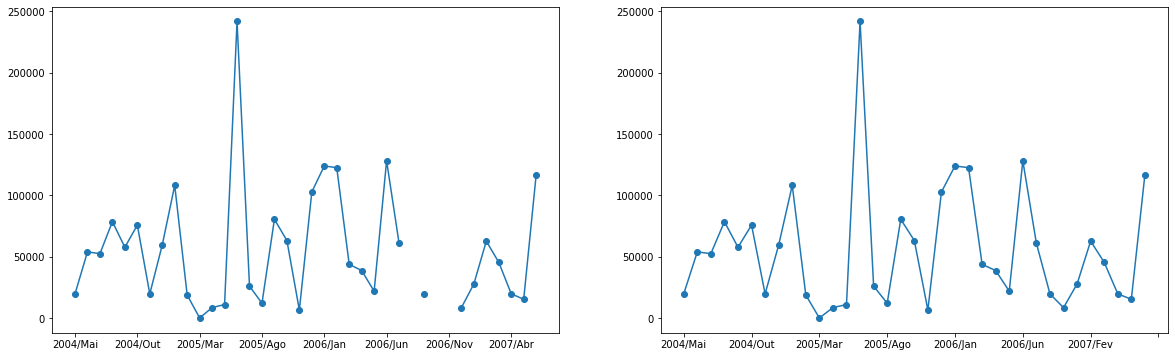

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
dados_estado.plot(marker='o')
plt.subplot(122)
dados_estado.dropna().plot(marker='o')

In [ ]:
dados_estado.fillna(value=dados_estado.mean())

2004/Mai     19904.670
2004/Jun     54089.020
2004/Jul     52643.020
2004/Ago     78691.890
2004/Set     57860.430
2004/Out     75911.520
2004/Nov     19904.670
2004/Dez     59719.850
2005/Jan    108286.560
2005/Fev     18977.880
2005/Mar       295.750
2005/Abr      8733.400
2005/Mai     11209.330
2005/Jun    241658.520
2005/Jul     26221.200
2005/Ago     12288.960
2005/Set     80635.370
2005/Out     63357.240
2005/Nov      6786.520
2005/Dez    102887.270
2006/Jan    124056.770
2006/Fev    122631.650
2006/Mar     43950.400
2006/Abr     38882.550
2006/Mai     22101.440
2006/Jun    128217.430
2006/Jul     61142.610
2006/Ago     55953.494
2006/Set     19904.670
2006/Out     55953.494
2006/Nov     55953.494
2006/Dez      8695.450
2007/Jan     27961.350
2007/Fev     62859.390
2007/Mar     45586.580
2007/Abr     19967.710
2007/Mai     15514.230
2007/Jun    116836.990
Name: 35 São Paulo, dtype: float64

In [ ]:
pd.merge(dados_estado,dados_estado.fillna(value=dados_estado.mean()), left_index=True, right_index=True)

,35 São Paulo_x,35 São Paulo_y
2004/Mai,19904.67,19904.670
2004/Jun,54089.02,54089.020
2004/Jul,52643.02,52643.020
2004/Ago,78691.89,78691.890
2004/Set,57860.43,57860.430
2004/Out,75911.52,75911.520
2004/Nov,19904.67,19904.670
2004/Dez,59719.85,59719.850
2005/Jan,108286.56,108286.560
2005/Fev,18977.88,18977.880


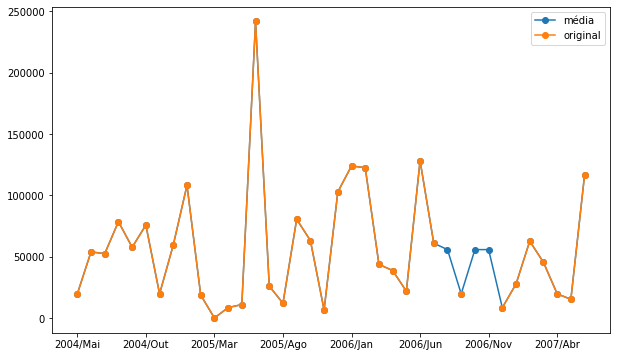

In [ ]:
dados_estado.fillna(value=dados_estado.mean()).plot(marker='o',figsize=(10,6))
dados_estado.plot(marker='o')
plt.legend(['média', 'original'])

In [ ]:
dados_estado.fillna(method='backfill')

2004/Mai     19904.67
2004/Jun     54089.02
2004/Jul     52643.02
2004/Ago     78691.89
2004/Set     57860.43
2004/Out     75911.52
2004/Nov     19904.67
2004/Dez     59719.85
2005/Jan    108286.56
2005/Fev     18977.88
2005/Mar       295.75
2005/Abr      8733.40
2005/Mai     11209.33
2005/Jun    241658.52
2005/Jul     26221.20
2005/Ago     12288.96
2005/Set     80635.37
2005/Out     63357.24
2005/Nov      6786.52
2005/Dez    102887.27
2006/Jan    124056.77
2006/Fev    122631.65
2006/Mar     43950.40
2006/Abr     38882.55
2006/Mai     22101.44
2006/Jun    128217.43
2006/Jul     61142.61
2006/Ago     19904.67
2006/Set     19904.67
2006/Out      8695.45
2006/Nov      8695.45
2006/Dez      8695.45
2007/Jan     27961.35
2007/Fev     62859.39
2007/Mar     45586.58
2007/Abr     19967.71
2007/Mai     15514.23
2007/Jun    116836.99
Name: 35 São Paulo, dtype: float64

In [ ]:
pd.merge(dados_estado,dados_estado.fillna(method='backfill'), left_index=True, right_index=True)

,35 São Paulo_x,35 São Paulo_y
2004/Mai,19904.67,19904.67
2004/Jun,54089.02,54089.02
2004/Jul,52643.02,52643.02
2004/Ago,78691.89,78691.89
2004/Set,57860.43,57860.43
2004/Out,75911.52,75911.52
2004/Nov,19904.67,19904.67
2004/Dez,59719.85,59719.85
2005/Jan,108286.56,108286.56
2005/Fev,18977.88,18977.88


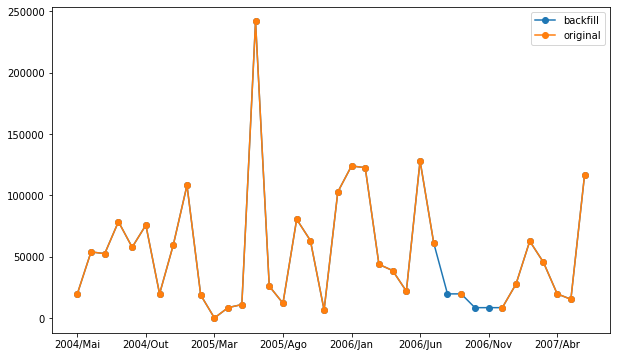

In [ ]:
dados_estado.fillna(method='backfill').plot(marker='o',figsize=(10,6))
dados_estado.plot(marker='o')
plt.legend(['backfill', 'original'])

In [ ]:
dados_estado.interpolate()

2004/Mai     19904.670000
2004/Jun     54089.020000
2004/Jul     52643.020000
2004/Ago     78691.890000
2004/Set     57860.430000
2004/Out     75911.520000
2004/Nov     19904.670000
2004/Dez     59719.850000
2005/Jan    108286.560000
2005/Fev     18977.880000
2005/Mar       295.750000
2005/Abr      8733.400000
2005/Mai     11209.330000
2005/Jun    241658.520000
2005/Jul     26221.200000
2005/Ago     12288.960000
2005/Set     80635.370000
2005/Out     63357.240000
2005/Nov      6786.520000
2005/Dez    102887.270000
2006/Jan    124056.770000
2006/Fev    122631.650000
2006/Mar     43950.400000
2006/Abr     38882.550000
2006/Mai     22101.440000
2006/Jun    128217.430000
2006/Jul     61142.610000
2006/Ago     40523.640000
2006/Set     19904.670000
2006/Out     16168.263333
2006/Nov     12431.856667
2006/Dez      8695.450000
2007/Jan     27961.350000
2007/Fev     62859.390000
2007/Mar     45586.580000
2007/Abr     19967.710000
2007/Mai     15514.230000
2007/Jun    116836.990000
Name: 35 São

In [ ]:
pd.merge(dados_estado,dados_estado.interpolate(), left_index=True, right_index=True)

,35 São Paulo_x,35 São Paulo_y
2004/Mai,19904.67,19904.670000
2004/Jun,54089.02,54089.020000
2004/Jul,52643.02,52643.020000
2004/Ago,78691.89,78691.890000
2004/Set,57860.43,57860.430000
2004/Out,75911.52,75911.520000
2004/Nov,19904.67,19904.670000
2004/Dez,59719.85,59719.850000
2005/Jan,108286.56,108286.560000
2005/Fev,18977.88,18977.880000


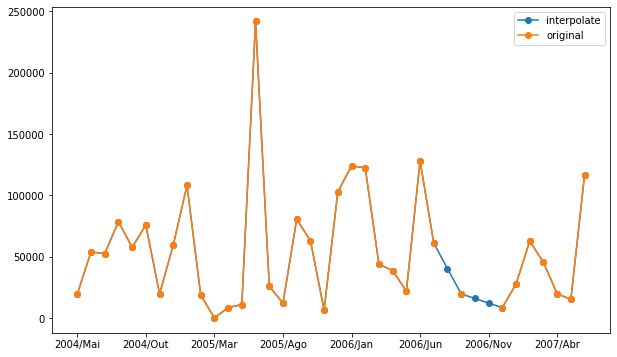

In [ ]:
dados_estado.interpolate().plot(marker='o',figsize=(10,6))
dados_estado.plot(marker='o')
plt.legend(['interpolate', 'original'])

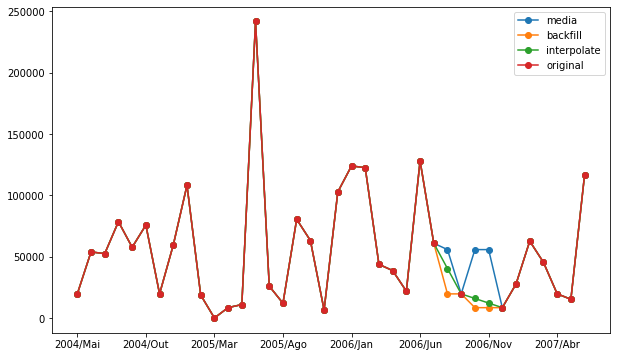

In [ ]:
dados_estado.fillna(value=dados_estado.mean()).plot(marker='o',figsize=(10,6))
dados_estado.fillna(method='backfill').plot(marker='o',figsize=(10,6))
dados_estado.interpolate().plot(marker='o',figsize=(10,6))
dados_estado.plot(marker='o')
plt.legend(['media', 'backfill', 'interpolate', 'original'])